<a href="https://colab.research.google.com/github/Shakiful22/6220-Final-Project/blob/main/6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Python Modules

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta

In [ ]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [ ]:
#from bioinfokit.visuz import cluster

**Upload File**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Shakiful22/6220-Final-Project/main/riceClassification_final.csv')
df.head(n=25)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,6918,159.824554,55.802983,0.937066,7096,93.852390,0.734395,358.073,0.678027,2.864086,1
1,2,6740,157.886691,55.125855,0.937068,6895,92.637112,0.549576,353.261,0.678701,2.864113,1
2,3,5404,141.710321,49.476915,0.937070,5535,82.949301,0.520867,314.616,0.686062,2.864171,1
3,4,5914,148.574416,51.872403,0.937073,6102,86.775219,0.518863,336.804,0.655144,2.864229,0
4,5,5243,139.657904,48.702907,0.937223,5410,81.704314,0.556759,312.927,0.672827,2.867548,1
5,6,5624,144.594568,50.422622,0.937228,5840,84.620915,0.517245,333.803,0.634271,2.867653,1
6,7,4209,125.429474,43.739036,0.937229,4336,73.205637,0.584583,281.509,0.667428,2.867678,0
7,8,6233,151.994714,53.002623,0.937229,6405,89.084803,0.488059,345.904,0.654630,2.867683,1
8,9,5998,149.497561,52.129495,0.937235,6125,87.389306,0.492447,334.277,0.674533,2.867811,1
9,10,4473,129.074088,45.007688,0.937236,4572,75.466552,0.500448,288.153,0.676959,2.867823,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               250 non-null    int64  
 1   Area             250 non-null    int64  
 2   MajorAxisLength  250 non-null    float64
 3   MinorAxisLength  250 non-null    float64
 4   Eccentricity     250 non-null    float64
 5   ConvexArea       250 non-null    int64  
 6   EquivDiameter    250 non-null    float64
 7   Extent           250 non-null    float64
 8   Perimeter        250 non-null    float64
 9   Roundness        250 non-null    float64
 10  AspectRation     250 non-null    float64
 11  Class            250 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 23.6 KB


**Classes**

In [ ]:
y = df['Class']
classess_y = y.copy() # Edit
target = df['Class'].to_numpy()

**Features**


Data Matrix

In [ ]:
X = df.iloc[:,0:7]
X.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter
0,1,6918,159.824554,55.802983,0.937066,7096,93.852390
1,2,6740,157.886691,55.125855,0.937068,6895,92.637112
2,3,5404,141.710321,49.476915,0.937070,5535,82.949301
3,4,5914,148.574416,51.872403,0.937073,6102,86.775219
4,5,5243,139.657904,48.702907,0.937223,5410,81.704314
5,6,5624,144.594568,50.422622,0.937228,5840,84.620915
6,7,4209,125.429474,43.739036,0.937229,4336,73.205637
7,8,6233,151.994714,53.002623,0.937229,6405,89.084803
8,9,5998,149.497561,52.129495,0.937235,6125,87.389306
9,10,4473,129.074088,45.007688,0.937236,4572,75.466552


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,250.0,125.500000,72.312977,1.000000,63.250000,125.500000,187.750000,250.000000
Area,250.0,6036.360000,715.224439,3176.000000,5590.250000,6076.500000,6583.000000,8262.000000
MajorAxisLength,250.0,148.127406,10.498442,110.320331,142.828867,149.479753,156.501112,164.634259
MinorAxisLength,250.0,52.957945,5.509734,38.376971,50.214150,52.546835,54.728371,80.764685
Eccentricity,250.0,0.931069,0.029431,0.795591,0.937352,0.937521,0.937681,0.938401
ConvexArea,250.0,6204.072000,733.370216,3332.000000,5748.250000,6262.500000,6778.000000,8421.000000
EquivDiameter,250.0,87.507929,5.311075,63.590949,84.366625,87.959307,91.551821,102.564639


Notice that the data is not standardizd. So we need to standarize it.

In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,250.0,2.842171e-17,1.002006,-1.725136,-0.862568,0.000000,0.862568,1.725136
Area,250.0,4.432010e-16,1.002006,-4.007271,-0.624986,0.056235,0.765825,3.118049
MajorAxisLength,250.0,2.805756e-15,1.002006,-3.608432,-0.505710,0.129072,0.799214,1.575469
MinorAxisLength,250.0,-7.895906e-16,1.002006,-2.651711,-0.498989,-0.074765,0.321972,5.056963
Eccentricity,250.0,2.106204e-15,1.002006,-4.612488,0.213892,0.219659,0.225089,0.249630
ConvexArea,250.0,-1.669775e-16,1.002006,-3.924121,-0.622791,0.079830,0.784160,3.028996
EquivDiameter,250.0,1.511680e-15,1.002006,-4.512261,-0.592649,0.085159,0.762935,2.840651


Notice that the data is now standardizd.

**Observations and variables**

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

Class Distribution

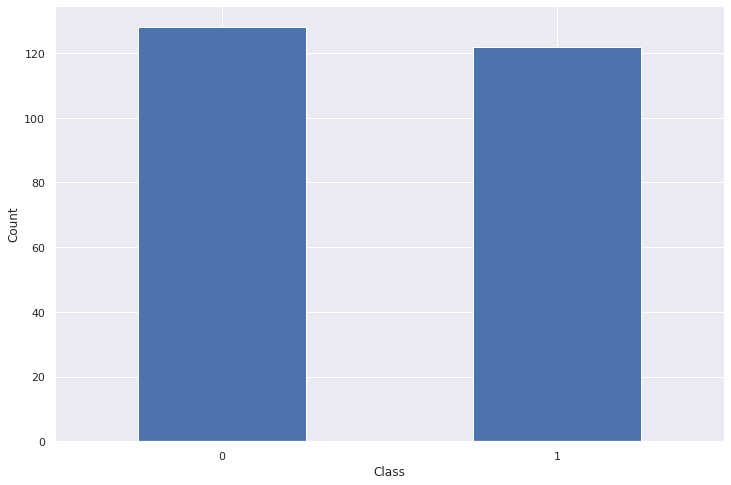

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Box & Whisker Plots

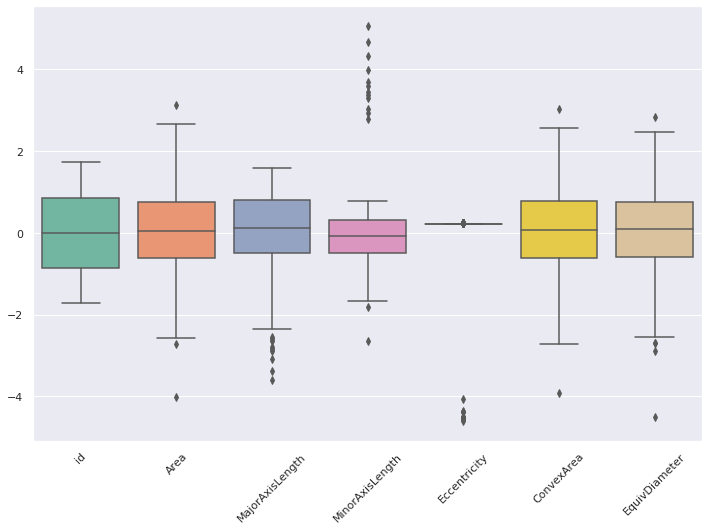

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

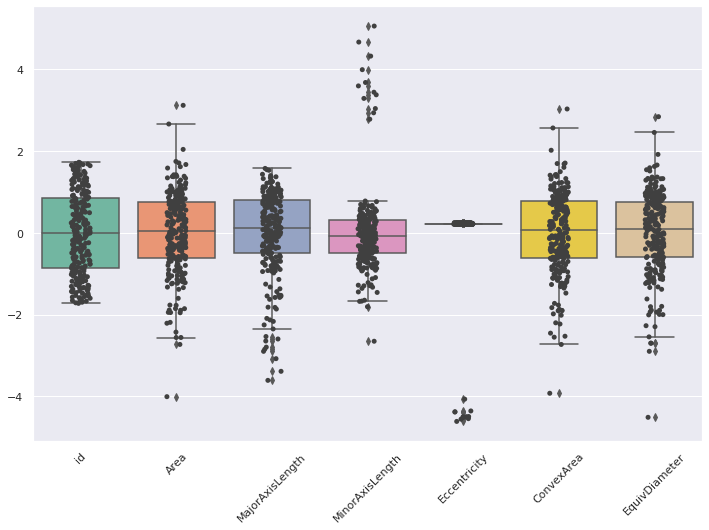

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Five Number Summary

In [ ]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter
count,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02
mean,2.842171e-17,4.432010e-16,2.805756e-15,-7.895906e-16,2.106204e-15,-1.669775e-16,1.511680e-15
std,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00
min,-1.725136e+00,-4.007271e+00,-3.608432e+00,-2.651711e+00,-4.612488e+00,-3.924121e+00,-4.512261e+00
25%,-8.625682e-01,-6.249855e-01,-5.057101e-01,-4.989895e-01,2.138919e-01,-6.227910e-01,-5.926494e-01
50%,0.000000e+00,5.623483e-02,1.290725e-01,-7.476498e-02,2.196594e-01,7.983036e-02,8.515871e-02
75%,8.625682e-01,7.658247e-01,7.992143e-01,3.219715e-01,2.250893e-01,7.841596e-01,7.629348e-01
max,1.725136e+00,3.118049e+00,1.575469e+00,5.056963e+00,2.496303e-01,3.028996e+00,2.840651e+00


Pair Plot

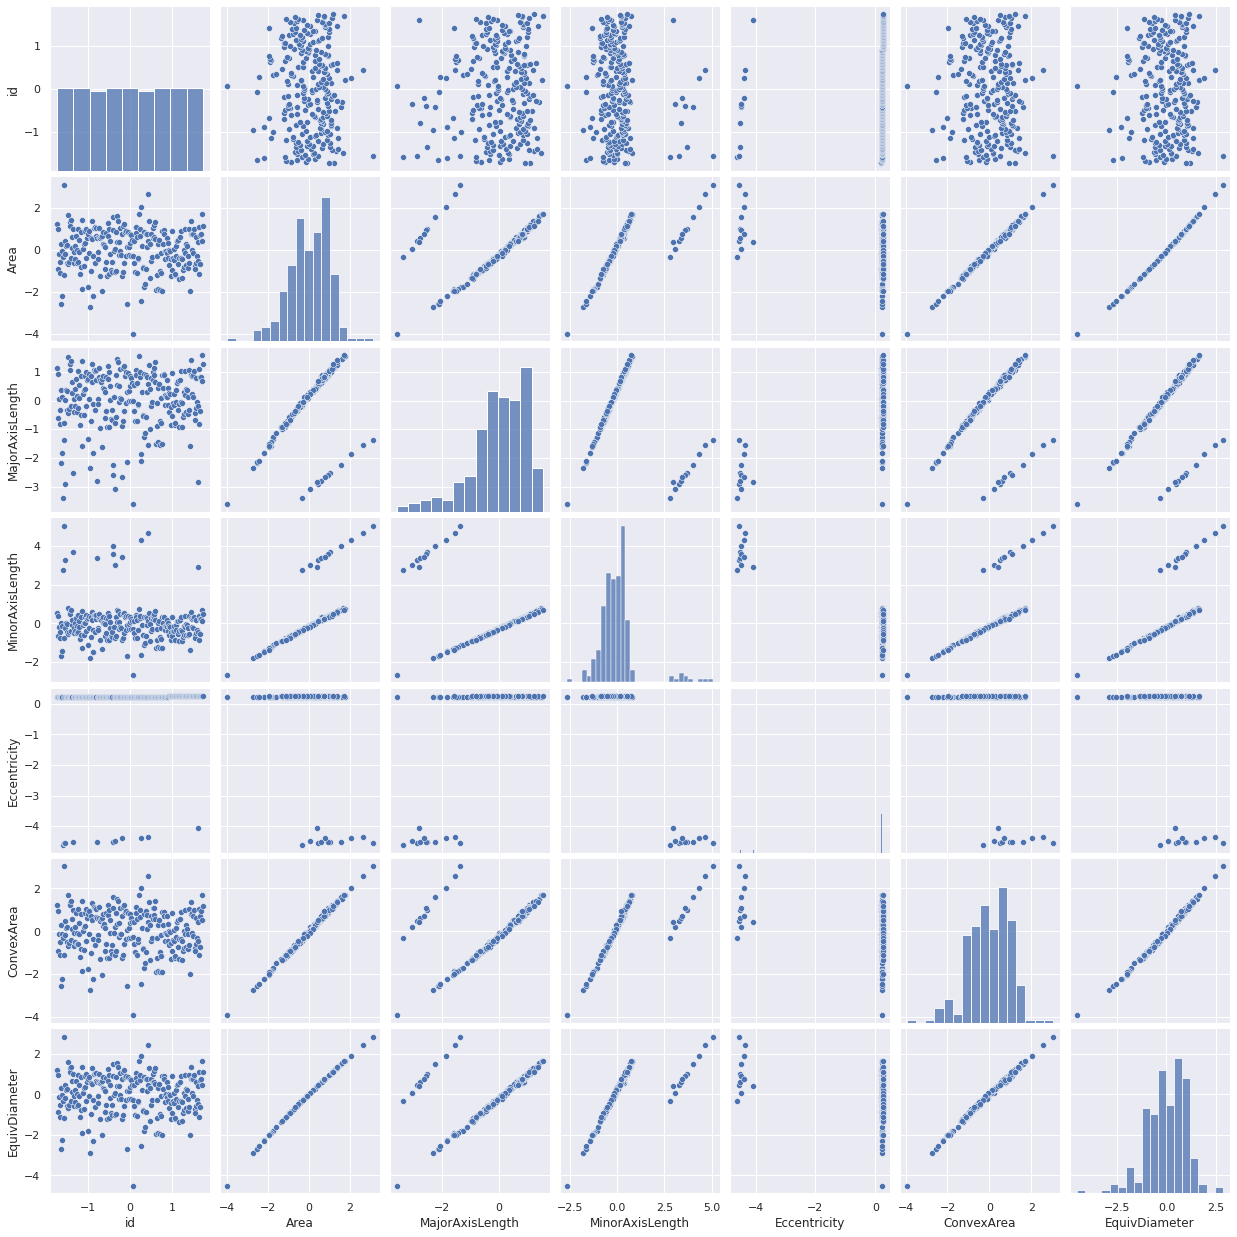

In [ ]:
sns.pairplot(df)

Covariance

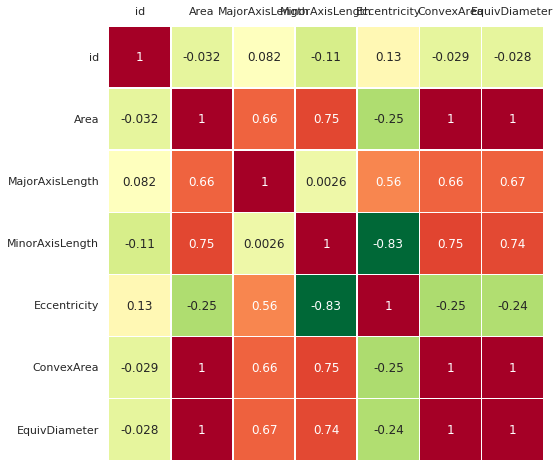

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

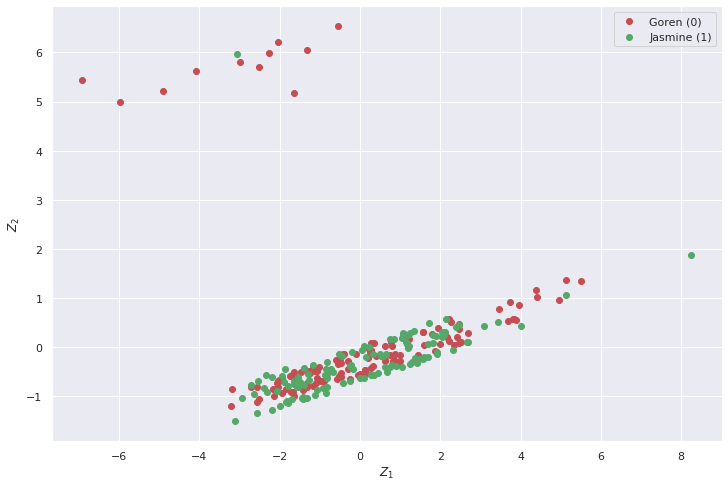

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Goren)->0,  2(Jasmine)->1
idx_Goren = np.where(y == 0)
idx_Jasmine = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Goren,0], Z[idx_Goren,1], c='r', label='Goren (0)')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='g', label='Jasmine (1)')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

Eigenvectors

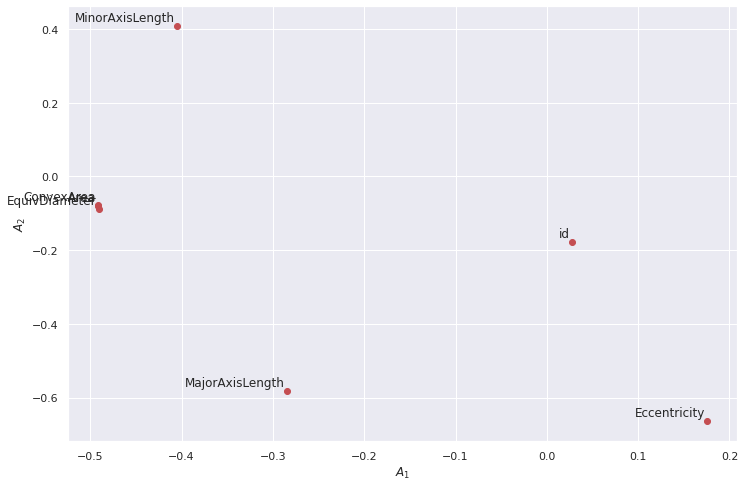

In [ ]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


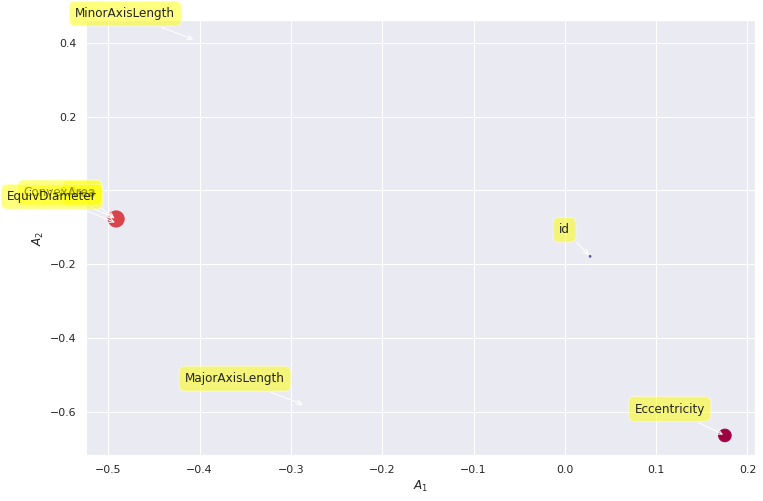

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

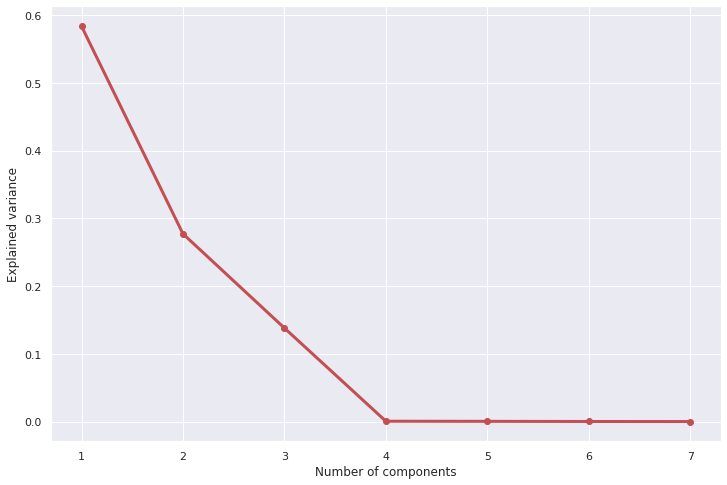

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

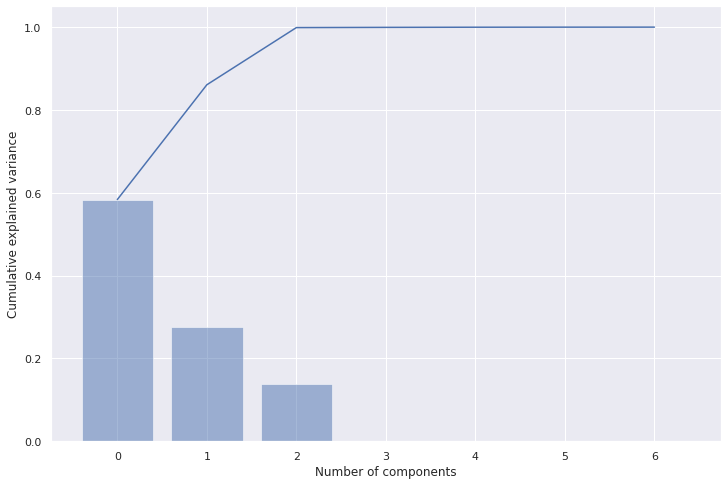

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (58.4%)',
 '1': 'PC 2 (27.7%)',
 '2': 'PC 3 (13.8%)',
 '3': 'PC 4 (0.1%)',
 '4': 'PC 5 (0.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)'}

### **Biplot**

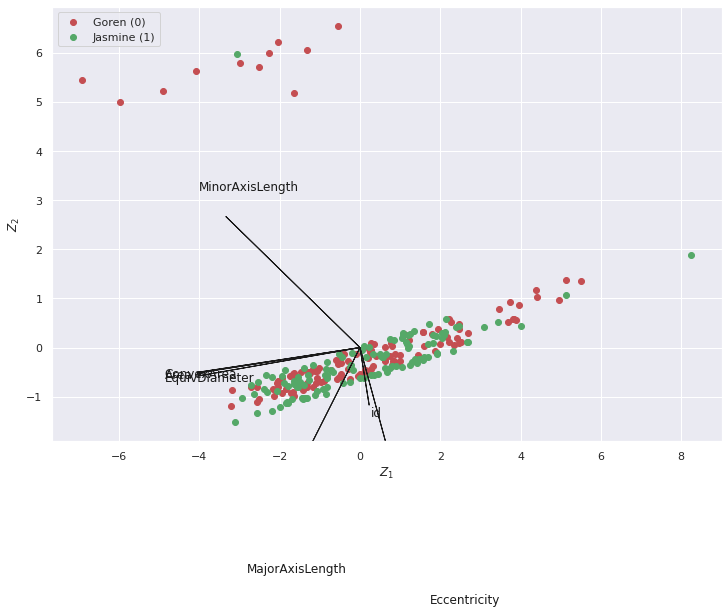

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Goren,0], Z[idx_Goren,1], c='r', label='Goren (0)')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='g', label='Jasmine (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [ ]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC          feature   loading  type
0  PC1             Area -0.491369  best
1  PC2     Eccentricity -0.664749  best
2  PC3               id  0.983437  best
3  PC2  MajorAxisLength -0.582700  weak
4  PC2  MinorAxisLength  0.407859  weak
5  PC1       ConvexArea -0.491358  weak
6  PC1    EquivDiameter -0.490632  weak


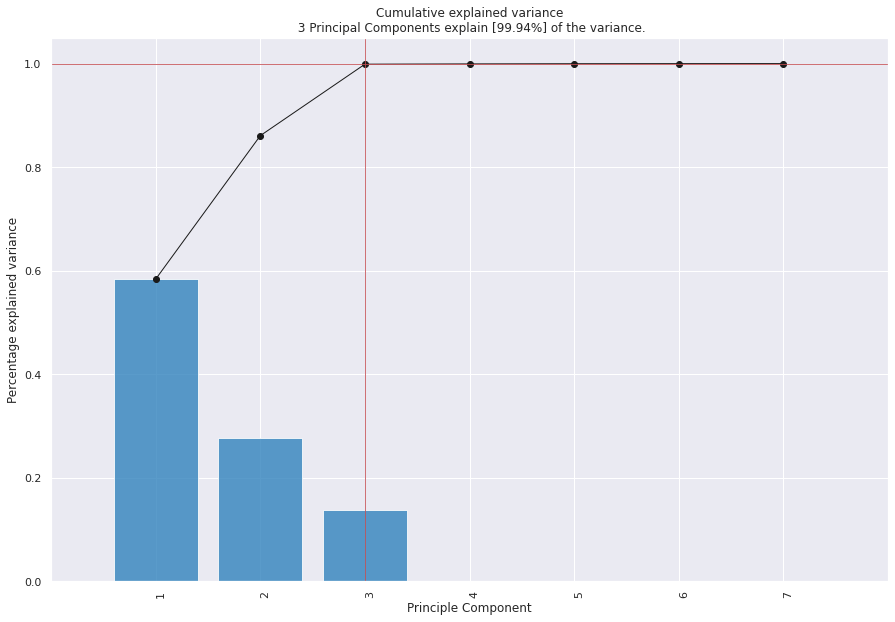

<Figure size 864x576 with 0 Axes>

In [ ]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


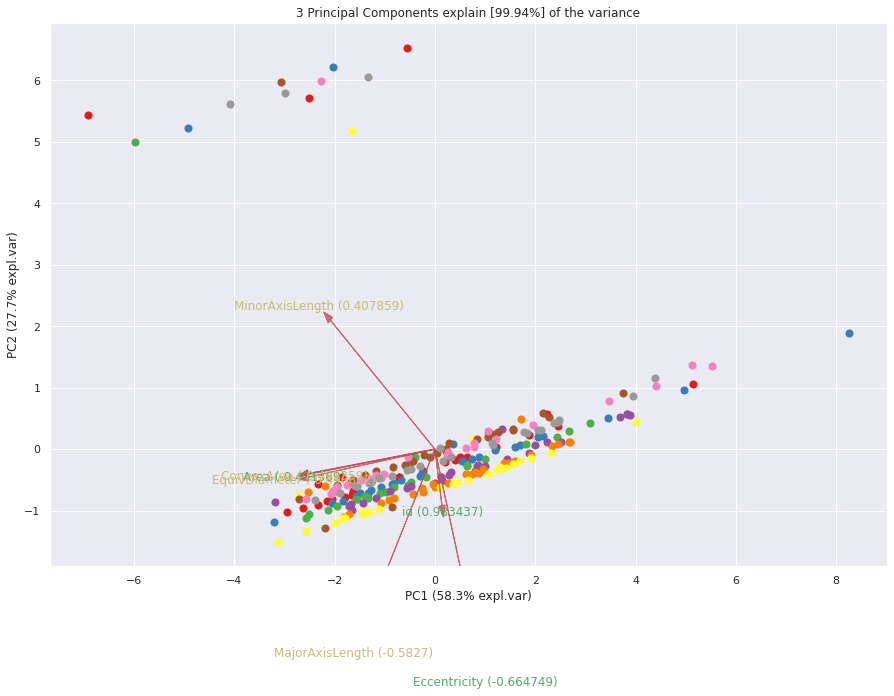

In [ ]:
ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


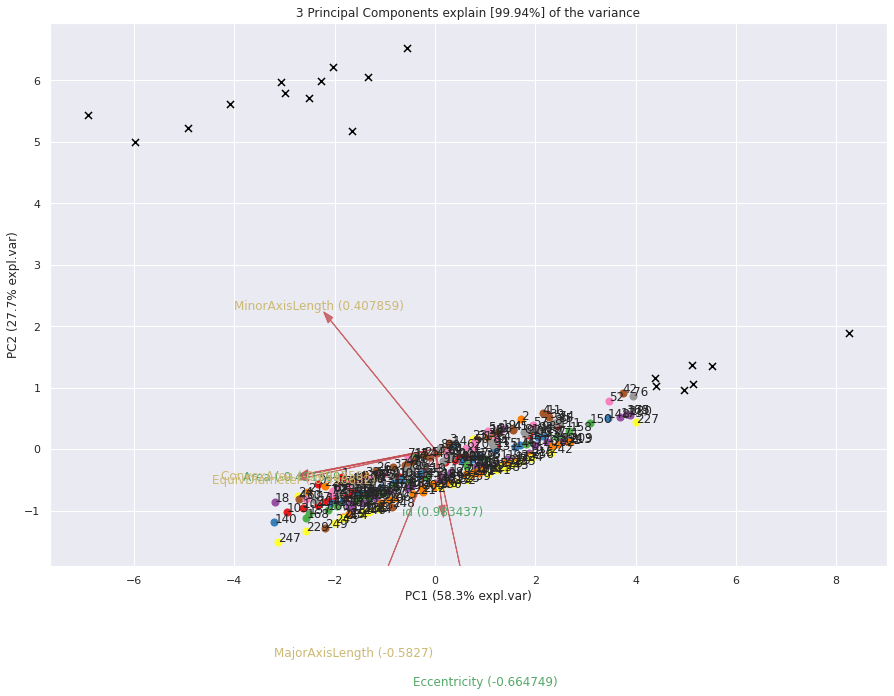

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd6f38451d0>)

In [ ]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


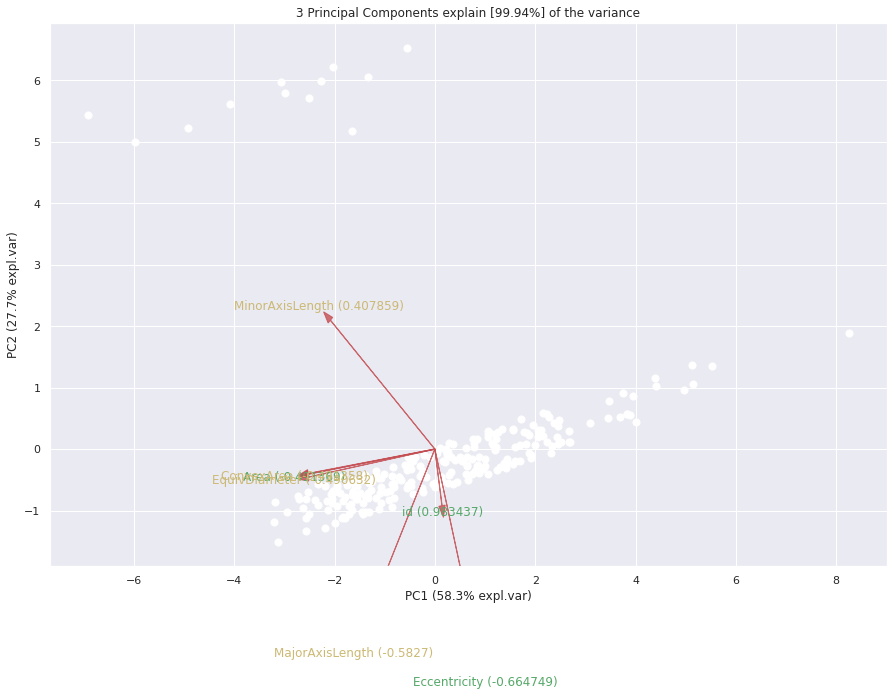

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd6f35ad210>)

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


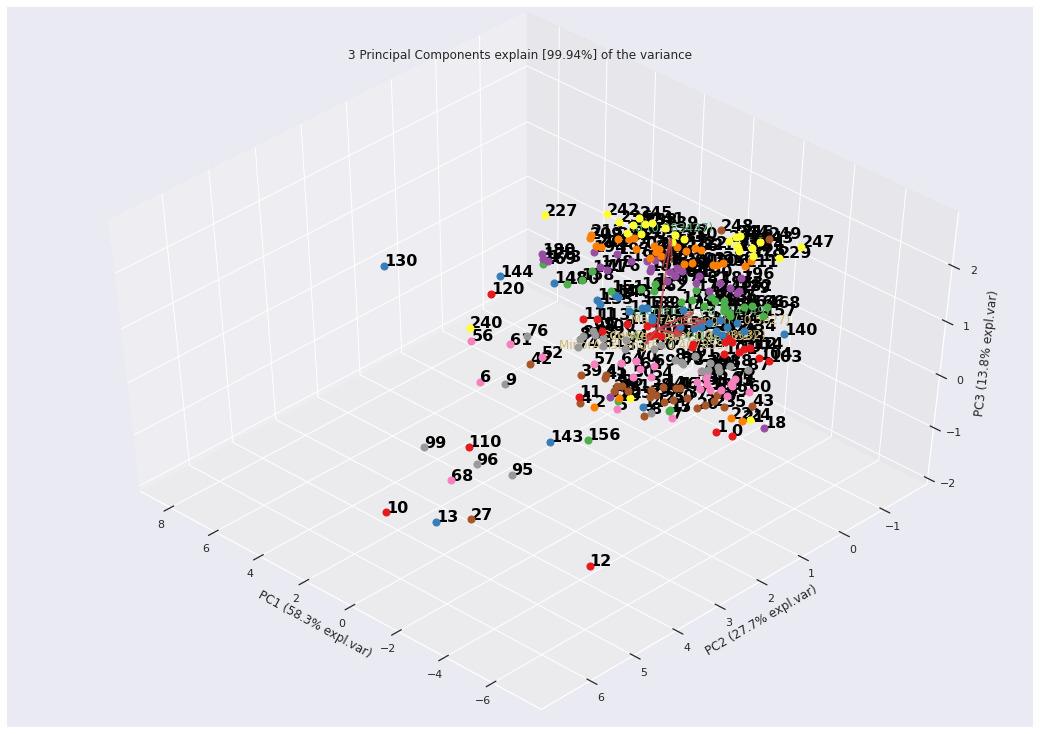

In [ ]:
ax = model.biplot3d(legend=False)

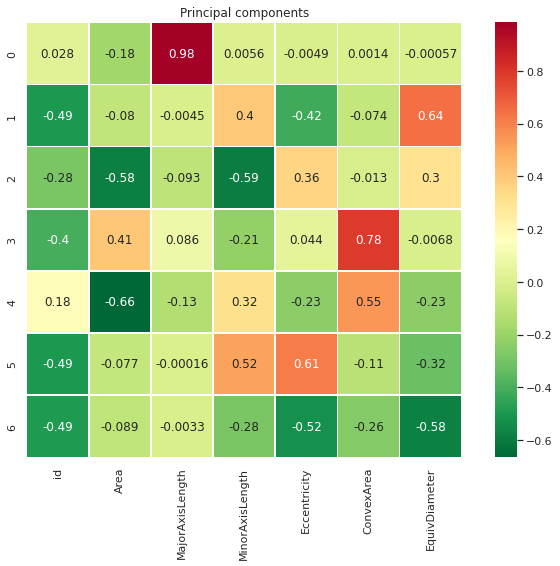

PC1:[ 0.02772764 -0.4913688  -0.28474551 -0.40474909  0.17531031 -0.49135807
 -0.49063182]
PC2:[-0.17895538 -0.07958938 -0.58270001  0.40785903 -0.66474886 -0.07729467
 -0.08880712]


In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

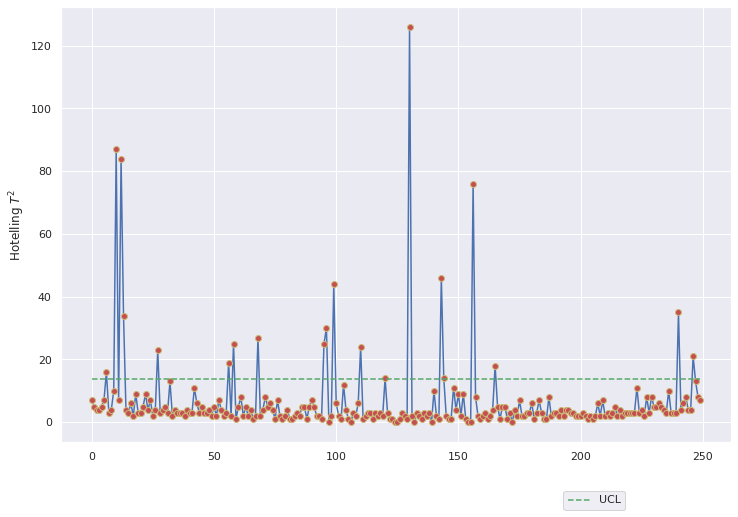

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[  6]
 [ 10]
 [ 12]
 [ 13]
 [ 27]
 [ 56]
 [ 58]
 [ 68]
 [ 95]
 [ 96]
 [ 99]
 [110]
 [120]
 [130]
 [143]
 [144]
 [156]
 [165]
 [240]
 [246]]


**Control Charts for Principal Components**

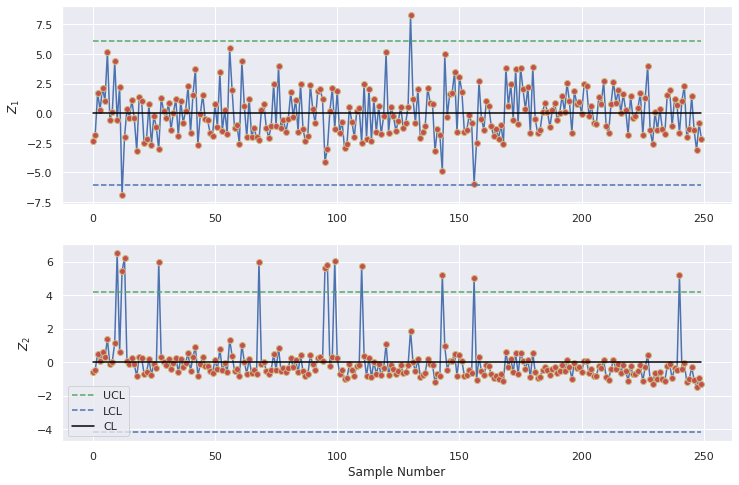

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

Out of Control Points

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[[12]]
[[130]]
[]
[[ 10]
 [ 12]
 [ 13]
 [ 27]
 [ 68]
 [ 95]
 [ 96]
 [ 99]
 [110]
 [143]
 [156]
 [240]]


**Multi-Class Classification**

In [ ]:
# Test-Train Split
# X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df,classess_y, test_size=0.3, random_state=0) 
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z,classess_y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], classess_y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 175
Test Dataset Size: 75


**Gaussian Naive Bayes (GNB)**

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.733     0.262     0.386        42
           1      0.483     0.879     0.624        33

    accuracy                          0.533        75
   macro avg      0.608     0.570     0.505        75
weighted avg      0.623     0.533     0.491        75



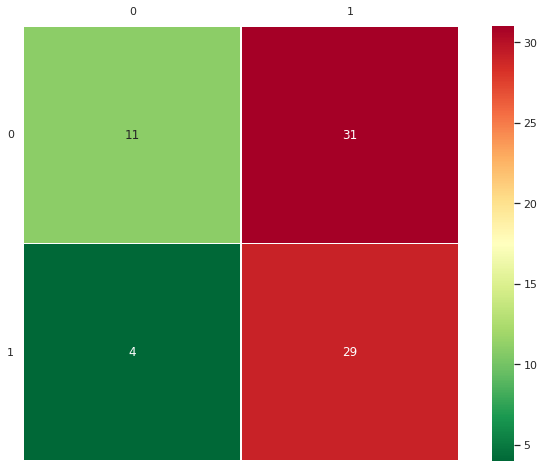

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.647     0.262     0.373        42
           1      0.466     0.818     0.593        33

    accuracy                          0.507        75
   macro avg      0.556     0.540     0.483        75
weighted avg      0.567     0.507     0.470        75



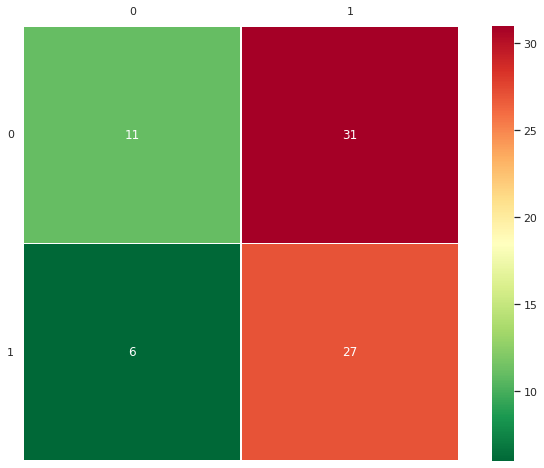

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.800     0.190     0.308        42
           1      0.477     0.939     0.633        33

    accuracy                          0.520        75
   macro avg      0.638     0.565     0.470        75
weighted avg      0.658     0.520     0.451        75



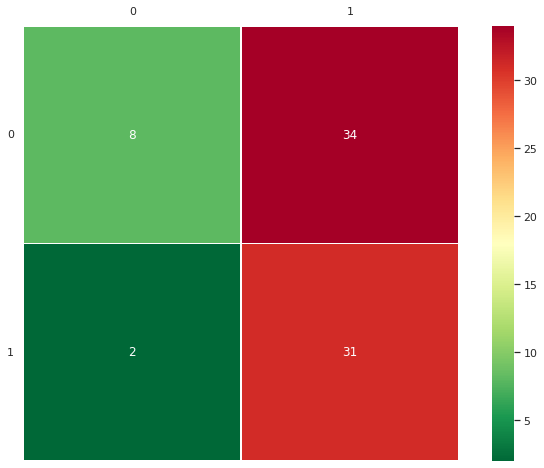

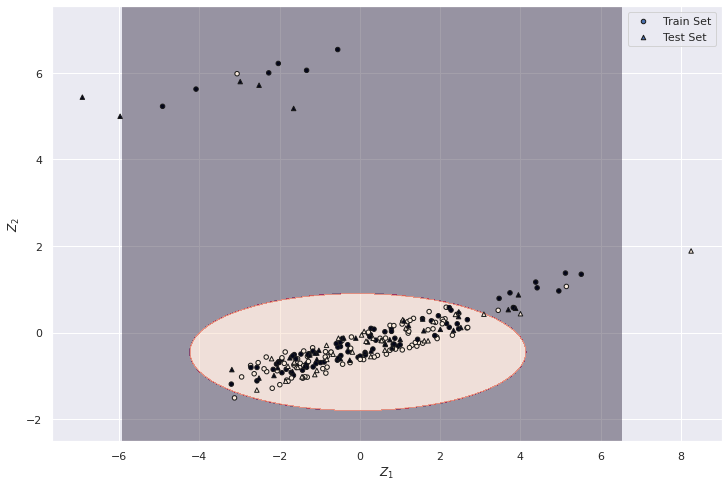

(array([ 3,  5,  6,  8, 12, 13, 15, 16, 17, 21, 23, 27, 28, 34, 35, 36, 42,
       43, 46, 47, 48, 49, 50, 51, 53, 54, 57, 58, 59, 61, 63, 64, 67, 72,
       73, 74]),)


In [ ]:
from sklearn.naive_bayes import GaussianNB   # Edit
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}
                                    0         1         2         3         4
knn_full_data fit_time       0.004151  0.002468  0.002157  0.002200  0.002198
knn_Z  fit_time              0.000959  0.000961  0.000946  0.000931  0.000913
knn_Z12 fit_time             0.000942  0.000868  0.000835  0.000873  0.000843
knn_full_data test_f1_macro  0.708333  0.558452  0.668389  0.571678  0.739454
knn_Z  test_f1_macro         0.708333  0.558452  0.668389  0.571678  0.739454
knn_Z12 test_f1_macro        0.514339  0.702381  0.533333  0.449584  0.558452

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.720     0.857     0.783        42
           1      0.760     0.576     0.655        33

    accuracy                          0.733        75
   macro avg      0.740     0.716     0.719        75
weighted avg      0.738     0.733   

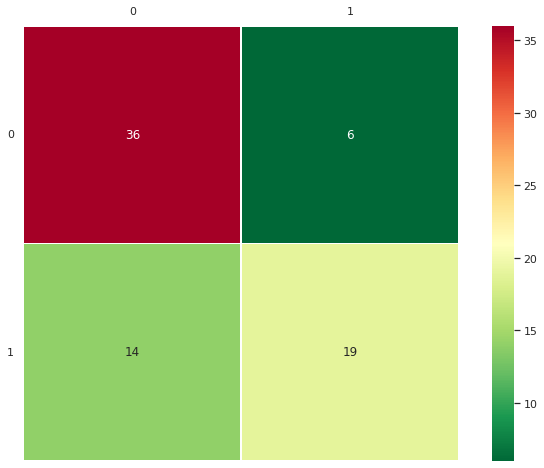

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.720     0.857     0.783        42
           1      0.760     0.576     0.655        33

    accuracy                          0.733        75
   macro avg      0.740     0.716     0.719        75
weighted avg      0.738     0.733     0.727        75



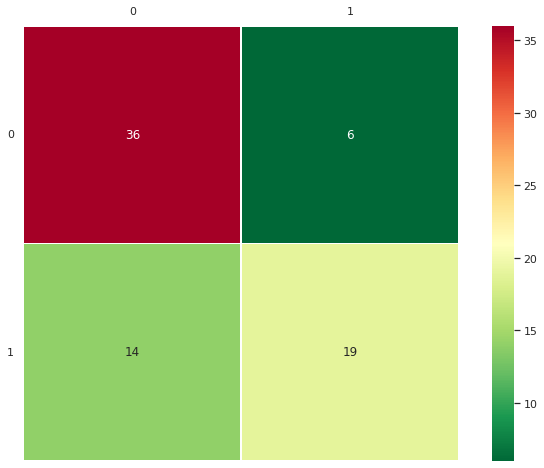

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.614     0.833     0.707        42
           1      0.611     0.333     0.431        33

    accuracy                          0.613        75
   macro avg      0.613     0.583     0.569        75
weighted avg      0.613     0.613     0.586        75



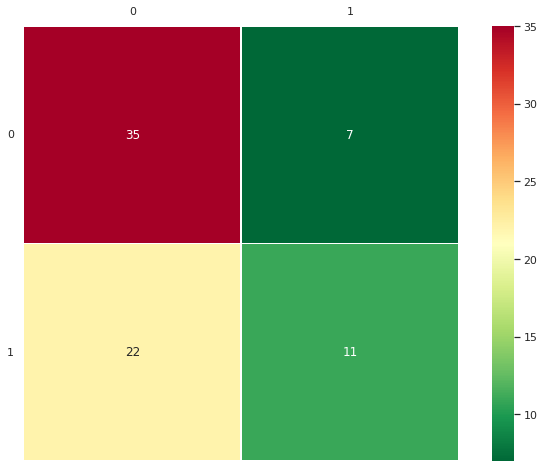

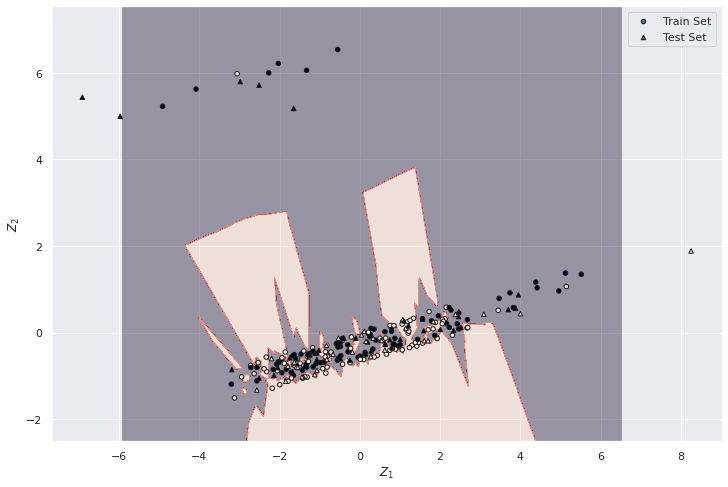

In [ ]:
# Hyperparameter grid search for k
from sklearn.neighbors import KNeighborsClassifier  # Edit
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

## **ROC Curves**

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

NameError: ignored

## **Bar Chart Plot**

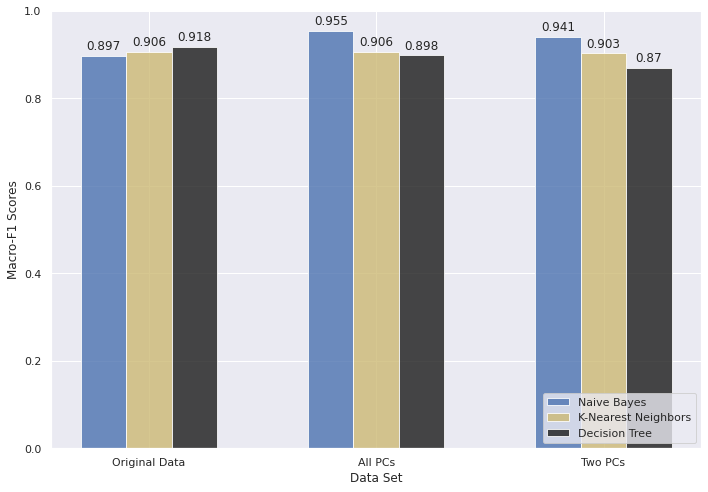

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()